In [1]:
import pandas as pd
import numpy as np


In [2]:
data1= pd.read_csv("/content/titanic_dataset (1).csv")
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data1=data1.drop("PassengerId",axis=1)

In [4]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
data1=data1.drop("Cabin",axis=1)

In [7]:
num_cols=data1[["Embarked","Age"]]

In [8]:
from sklearn.impute import SimpleImputer

In [10]:
imputer =SimpleImputer(missing_values =np.nan,strategy ='most_frequent')

In [11]:
imputer = imputer.fit(num_cols)

In [12]:
num_cols = imputer.transform(num_cols)

In [13]:
type(num_cols)

numpy.ndarray

In [15]:
num_cols = pd.DataFrame(num_cols,columns=["Embarked","Age"])

In [16]:
type(num_cols)

pandas.core.frame.DataFrame

In [17]:
num_cols.isna().sum()

Embarked    0
Age         0
dtype: int64

In [18]:
data1=data1.drop(["Embarked","Age"],axis=1)

In [19]:
data1.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


In [20]:
data1=pd.concat([num_cols,data1],axis=1)

In [21]:
data1.head()

,Embarked,Age,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,S,22.0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,C,38.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,S,26.0,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,S,35.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,S,35.0,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


In [22]:
data1.isna().sum()

Embarked    0
Age         0
Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Age')

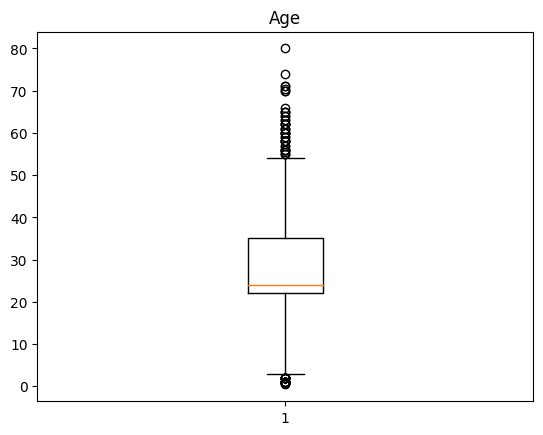

In [24]:
plt.boxplot(data1['Age'])
plt.title('Age')

In [25]:
Q1 =np.percentile(data1['Age'],25)
Q1

22.0

In [26]:
Q2 =np.percentile(data1['Age'],50)
Q2

24.0

In [29]:
Q3 =np.percentile(data1['Age'],75)
Q3

35.0

In [30]:
IQR =Q3-Q1

In [31]:
IQR

13.0

In [32]:
low_limit=Q1-1.5*IQR
upr_limit=Q3+1.5*IQR

In [33]:
low_limit

2.5

In [34]:
upr_limit

54.5

In [36]:
outlier =[]
for x in data1['Age']:
    if x>upr_limit or x<low_limit:
      outlier.append(x)

In [37]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [38]:
ind =data1['Age']>upr_limit
data1.loc[ind].index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [39]:
data1.drop([11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],inplace = True)

In [40]:
data1.shape

(849, 10)

In [41]:
data1=data1.drop(["Name"],axis=1)

In [43]:
data1=data1.drop(["Ticket"],axis=1)

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() ## encoding string to numerical pattern
data1['Sex'] =le.fit_transform(data1['Sex'])
data1

,Embarked,Age,Survived,Pclass,Sex,SibSp,Parch,Fare
0,S,22.0,0,3,1,1,0,7.2500
1,C,38.0,1,1,0,1,0,71.2833
2,S,26.0,1,3,0,0,0,7.9250
3,S,35.0,1,1,0,1,0,53.1000
4,S,35.0,0,3,1,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,S,27.0,0,2,1,0,0,13.0000
887,S,19.0,1,1,0,0,0,30.0000
888,S,24.0,0,3,0,1,2,23.4500
889,C,26.0,1,1,1,0,0,30.0000


In [45]:
data1['Embarked'] =le.fit_transform(data1['Embarked'])
data1

,Embarked,Age,Survived,Pclass,Sex,SibSp,Parch,Fare
0,2,22.0,0,3,1,1,0,7.2500
1,0,38.0,1,1,0,1,0,71.2833
2,2,26.0,1,3,0,0,0,7.9250
3,2,35.0,1,1,0,1,0,53.1000
4,2,35.0,0,3,1,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,2,27.0,0,2,1,0,0,13.0000
887,2,19.0,1,1,0,0,0,30.0000
888,2,24.0,0,3,0,1,2,23.4500
889,0,26.0,1,1,1,0,0,30.0000


In [47]:
x=data1.drop('Survived',axis =1)

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
min_max=MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)

In [51]:
type(x)

numpy.ndarray

In [52]:
x=pd.DataFrame(x)

In [53]:
type(x)

pandas.core.frame.DataFrame

In [54]:
x.describe()

,0,1,2,3,4,5,6
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,0.771496,0.494458,0.673734,0.641932,0.067727,0.064389,0.061660
std,0.393296,0.207145,0.410109,0.479715,0.140462,0.134868,0.096872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.402762,0.500000,0.000000,0.000000,0.000000,0.015412
50%,1.000000,0.440090,1.000000,1.000000,0.000000,0.000000,0.027538
75%,1.000000,0.608063,1.000000,1.000000,0.125000,0.000000,0.059532
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
corr_matrix =data1.corr()

<ipython-input-55-0a0b850dd1b9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =data1.corr()


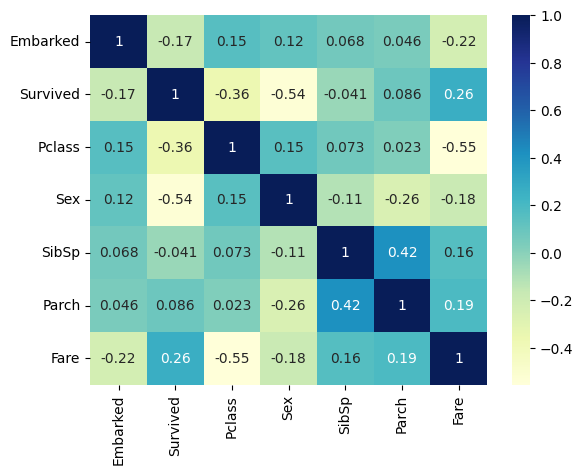

In [56]:
sns.heatmap(corr_matrix,annot =True,cmap = 'YlGnBu')
plt.show()

In [57]:
x=data1.drop(["Survived"],axis=1)

In [58]:
y=data1["Survived"]

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class="multinomial",solver="lbfgs",max_iter=1000)
model =lr.fit(x_train,y_train)

In [66]:
y_predictions=model.predict(x_test)
y_predictions

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [68]:
confusion_matrix(y_test,y_predictions)

array([[83, 11],
       [27, 49]])

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
metric_k=[]
neighbors =np.arange(3,15)

In [71]:
for k in neighbors:
    classifier =KNeighborsClassifier(n_neighbors=k,metric="euclidean")
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [72]:
metric_k

[0.7470588235294118,
 0.7,
 0.7411764705882353,
 0.7176470588235294,
 0.7470588235294118,
 0.7235294117647059,
 0.7176470588235294,
 0.7294117647058823,
 0.6882352941176471,
 0.7235294117647059,
 0.7294117647058823,
 0.7411764705882353]

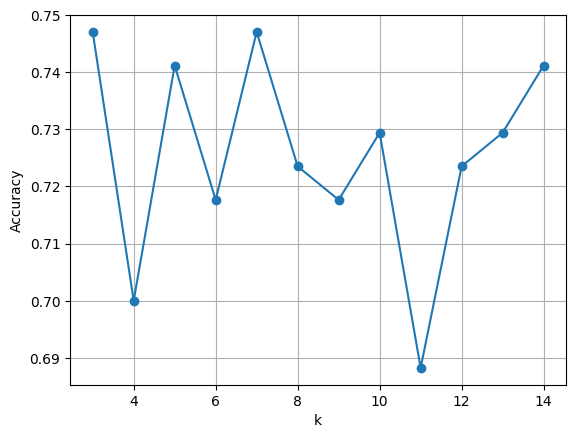

In [73]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid()

In [74]:
classifier =KNeighborsClassifier(n_neighbors=5,metric="euclidean")
classifier.fit(x_train,y_train)
y_predictions=classifier.predict(x_test)

In [75]:
print("Accuracy=",accuracy_score(y_test,y_predictions))
print("Precision=",precision_score(y_test,y_predictions,average=None))
print("Recall=",recall_score(y_test,y_predictions,average=None))
print("F1 Score=",f1_score(y_test,y_predictions,average=None))
confusion_matrix(y_test,y_predictions)

Accuracy= 0.7411764705882353
Precision= [0.75       0.72857143]
Recall= [0.79787234 0.67105263]
F1 Score= [0.77319588 0.69863014]


array([[75, 19],
       [25, 51]])

In [76]:
from sklearn.svm import SVC
svmclf = SVC(kernel= 'linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [77]:
y_pred=svmclf.predict(x_test)

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.7941176470588235


K FOLD TECHNIQUE

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
LR_model=LR_model.fit(x_test,y_test)


In [82]:
score_LR=LR_model.score(x_test,y_test)

In [83]:
score_LR

0.7764705882352941

In [79]:
from sklearn.model_selection import KFold
kfold_validator =KFold(10)
for train_index,test_index in kfold_validator.split(x,y):
  print("Training Index:",train_index)
  print("test Index",test_index)

Training Index: [ 85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282
 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300
 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318
 319 320 321 322 323 324 325 326 32

In [ ]:
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(LR_model,x,y,cv=kfold_validator)

In [85]:
cv_result

array([0.78823529, 0.8       , 0.76470588, 0.77647059, 0.78823529,
       0.76470588, 0.76470588, 0.76470588, 0.84705882, 0.83333333])

In [86]:
np.mean(cv_result)

0.7892156862745097

Stratified Cross validation

In [96]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)

In [97]:
for train_index,test_index in skfold_validator.split(x,y):
  print("Training Index:",train_index)
  print("test Index",test_index)

Training Index: [ 78  80  81  84  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282
 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300
 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318
 319 320 321 322 323 324 325 326 32

In [ ]:
cv_result=cross_val_score(LR_model,x,y,cv=skfold_validator)
cv_result

In [99]:
np.mean(cv_result)

0.7915686274509803